# Curve-fitting

## Problem
8 data points are collected where $X_i$ is the explanatory variable and $Y_i$ the response variable. It is believed that the data follows the trend $Y = aX^b+c$ where $a$, $b$ and $c$ are the parameters to be determined to fit the model.

| $X_i$  | $Y_i$  |
| :----- | :----- |
| 0.97   | 0.97   |
| 0      | 0.06   |
| 0.5    | 0.7    |
| 0.85   | 0.74   |
| 0.7    | 0.2    |
| 0.19   | 0.34   |
| 0.41   | 0.29   |
| 0.78   | 0.94   |

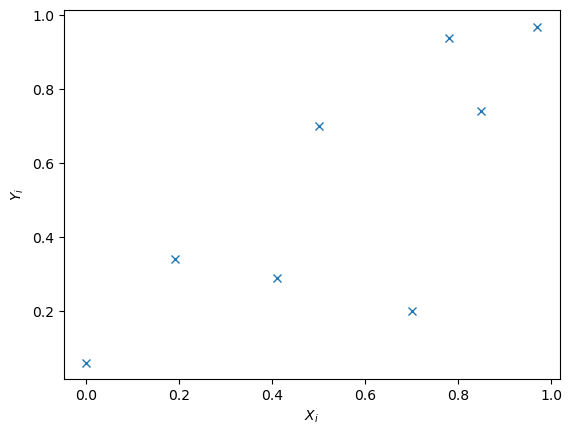

In [2]:
import numpy as np
import matplotlib.pylab as plt

xi = np.array([0.97,0,0.5,0.85,0.7,0.19,0.41,0.78])
yi = np.array([0.97,0.06,0.7,0.74,0.2,0.34,0.29,0.94])
plt.xlabel('$X_i$')
plt.ylabel('$Y_i$')
plt.plot(xi,yi,'x');

Examples of the source of this data can be:
 - Stress of a pre-stressed concrete specimen based on the deformation when applied an axial force
 - Permeability-coefficient for compacted sand based on the grain size
 - Job performance based on the number of working hours
 - etc.


# Model
The problem is modelled as a minimization of the squared error, where error is the difference between $a X_i^b+C$ and $Y_i$
$$\mathop {\min }\limits_{a,b,c} \sum\limits_{i = 1}^8 {{{\left( {a{X_i}^b + c - {Y_i}} \right)}^2}} $$

The plot below shows the data points and the total error squared.

Try and adjust the values for $a$, $b$ and $c$. How small can you get the total error squared?

In [4]:
from ipywidgets import widgets, interact
x_range = np.linspace(0.0001,1,100)
def func(a,b,c):
    fig, ax = plt.subplots(1, 1)
    ax.plot(xi,yi,'x')
    ax.plot(x_range,a * x_range**b + c);
    ax.set_xlim([-0,1])
    ax.set_ylim([-0,1])
    y_est = a * xi ** b + c
    error = np.sum((yi-y_est)**2)
    title = 'Total error squared $=$'+str(round(error,4))
    ax.set_title(title)
    for i in range(8):
        ax.annotate("",xy=[xi[i],yi[i]],xytext=[xi[i],max(min(a * xi[i] ** b + c,1),0)],arrowprops=dict(arrowstyle= '<->'))
    return

interact(func,
         a = widgets.FloatSlider(min=0, max=5, value=2, step=0.2, description="a"),
         b = widgets.FloatSlider(min=0, max=5, value=2, step=0.2, description="b"),
         c = widgets.FloatSlider(min=0, max=1, value=0.5, step=0.05, description="c"));

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, step=0.2), FloatSlider(value=2.0, descr…

## Method

Again, this model is described using `scipy.optimize.minimize` according to the [standard structure in this course](./Python_start_3.ipynb)

### Importing libraries


In [3]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

### Defining the variables
In this problem, there are 3 design variables: $a$, $b$ and $c$. In `scipy.optimize`, these variables are part of one array. You don't have to specify this variable beforehand, but the optimization algorithm will define the number of variables on your other input. Furthermore, input data is given which is required to specify explicitly. Additionally, an initial guess is required for the otimization algorithm.

In [4]:
xi = np.array([0.97, 0   , 0.5, 0.85, 0.7, 0.19, 0.41, 0.78])
yi = np.array([0.97, 0.06, 0.7, 0.74, 0.2, 0.34, 0.29, 0.94])
abc0 = np.array([4., 2., 0.5]) #initial guess

### Objective function
The objective function was alerady defined. Because `a`, `b`, `c` and `xi` are all numpy arrays, we can simply use `*`, `**` and `+` to deal with the multiplication, exponent and summation of those arrays. `np.sum` is used to sum up all components of the array which is the result of `(yi-y_est)**2`

In [5]:
def squarederror(abc):
    a = abc[0]
    b = abc[1]
    c = abc[2]
    y_est = a * xi ** b + c
    error = np.sum((yi-y_est)**2)
    return error

### Solve the problem
Now we can solve the actual problem

In [77]:
result = sp.optimize.minimize(squarederror,abc0)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.3342203980898386
        x: [ 8.028e-01  1.231e+00  1.233e-01]
      nit: 54
      jac: [-2.332e-06  2.570e-06 -3.166e-06]
 hess_inv: [[ 6.233e-01 -3.674e-01 -3.660e-01]
            [-3.674e-01  1.485e+01  2.251e+00]
            [-3.660e-01  2.251e+00  5.564e-01]]
     nfev: 276
     njev: 69


### Postprocessing
As this problem involves three design variables, a plot of all possible design variables with the objective function is not possible because it would require four dimensions. However, we can plot the data which the obtained solution to see how it looks like

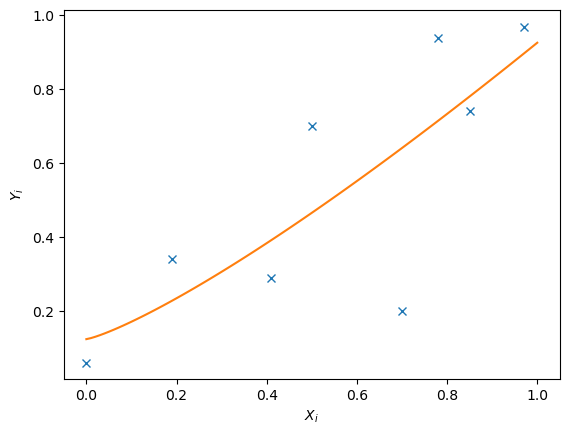

In [78]:
x_range = np.linspace(0,1,100)
plt.plot(xi,yi,'x');
plt.plot(x_range,result.x[0] * x_range ** result.x[1] + result.x[2])
plt.xlabel('$X_i$')
plt.ylabel('$Y_i$');